# [FACTORS THAT EFFECT THE LISTING PRICE IN AIRBNB'S - 64]

Group Members:

-  Aleyna Buse Sümer - 25429

-  Sena Naz Havuz    - 25069

#Introduction

<font color="blue">

</font>

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019 and includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

## Problem Definition

<font color="blue">
</font>

In this Project, we want to research the factors which have an 
effect on the listing price. This factors are:

1. Room Type
2. Neighborhood
3. The Number of Listings
4. Last Reviews
5. Availability

which may effect the listing price too.

## Utilized Datasets

<font color="blue">

</font>

For the factors "Room Type", "Neighborhood" , "The Number of Listings", "Last Reviews" and "Availability" ; we use the database from Kaggle:

 https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data



## Table of Content

1. Dataset
2. Exploratory Data Analysis
3. Visualization
4. Machine Learning Models
5. Conclusion
6. References

#Data Exploration

<font color="blue">
</font>

###Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path_prefix = "/content/drive/My Drive"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(join(path_prefix, "AB_NYC_2019.csv"))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Exploratory Data Analysis

- Examine the numerical and non-numerical variables
- Check the nul variables and types of the dataframe 
- Replacing the missing values
- Initial insights


In [ ]:
#separate out numerical variables
a=pd.DataFrame(df.dtypes.copy())
b= a[a[0] == 'object'].reset_index()
#drop id and host id:
non_num=b["index"].tolist()
print(non_num)

a=pd.DataFrame(df.dtypes.copy())
b= a[a[0] != 'object'].reset_index()
#drop id and host id:
numeric_vars=b["index"].tolist()
print(numeric_vars)

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']
['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


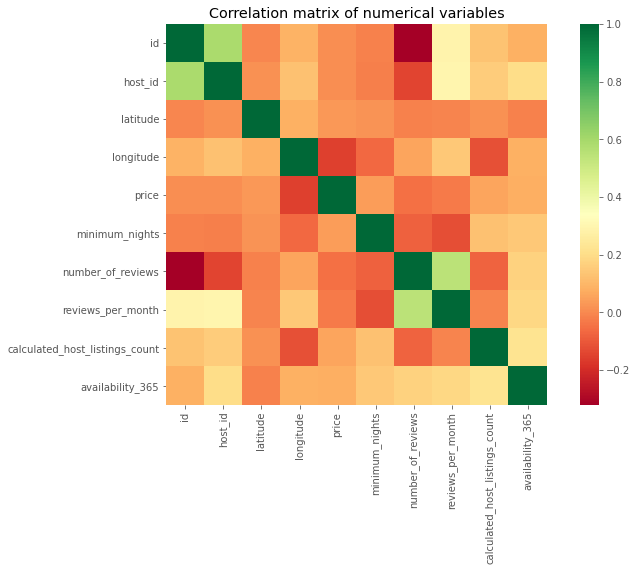

In [ ]:
#Displays the correlation between numerical variables

plt.figure(figsize=(12,7))
title = 'Correlation matrix of numerical variables'
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.title(title)
plt.ioff()

In [ ]:
#fill missing values for last review and reviews per month with 0
df[["last_review", "reviews_per_month"]] = df[["last_review", "reviews_per_month"]].fillna(0)

#if there is no host name or listing name fill in None
df[["name", "host_name"]] = df[["name", "host_name"]].fillna("None")

#Drop rows were price of the listing is 0. We are not intersted in "free" 
#listings as they are most likely an error.
free = len(df[df.price == 0])
df = df[df.price != 0].copy()

#Print initial insights:
print("The dataset of AB_NYC_2019 includes " + str(free)+ " listings with price of 0 USD, which had been removed")
print("There are " + str(len(df["id"].unique()))+" listings")
print("There are "+str(len(df.host_id.unique()))
      +" unique and indentifiable "+ "hosts.")
print("There are "+str(len(df[df["host_name"]=="None"]))
      +" unindentifiable "+ "hosts.")


The dataset of AB_NYC_2019 includes 11 listings with price of 0 USD, which had been removed
There are 48884 listings
There are 37455 unique and indentifiable hosts.
There are 21 unindentifiable hosts.


In [ ]:
(len(df[df["host_id"]==30985759]) == df[df["id"]==36485609]["calculated_host_listings_count"]).tolist()

[True]

In [ ]:
df[(df["calculated_host_listings_count"]>1)][["host_id","calculated_host_listings_count"]].sort_values(by=['host_id']).head(10)

,host_id,calculated_host_listings_count
0,2787,6
21556,2787,6
13963,2787,6
13583,2787,6
10372,2787,6
13688,2787,6
1,2845,2
22728,2845,2
8302,2881,2
7875,2881,2


Our first analysis about the dataset shows that:

- There are 11,492 more listings than hosts. This means that some hosts may list several properties. 

- Each listing contains "Calculated_host_listings_count", which is a count of total listing by a specific host in the provided data. The logic below derives value of the calculated host listings count for a specific listing and checks if it is equal to the total number of listings by that host.

- The comparison yields true, meaning that "calculated_host_listings_count" for the specific host indicated gives an accurate number of listings posted by the same host. Properties could then easily related by the host ID.

In [ ]:
#Assume that tourists will not want to stay longer than 31 days, so remove the rows which have minimum night bigger than 31 
#Also clear the null variables

df_old=df.copy()
df = df[df["minimum_nights"] <=31].copy()
removed_listings = len(df_old)-len(df)





At this point there are no null values in our dataframe.

In [ ]:
#Summary of the datafraeme
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48338 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48338 non-null  int64  
 1   name                            48338 non-null  object 
 2   host_id                         48338 non-null  int64  
 3   host_name                       48338 non-null  object 
 4   neighbourhood_group             48338 non-null  object 
 5   neighbourhood                   48338 non-null  object 
 6   latitude                        48338 non-null  float64
 7   longitude                       48338 non-null  float64
 8   room_type                       48338 non-null  object 
 9   price                           48338 non-null  int64  
 10  minimum_nights                  48338 non-null  int64  
 11  number_of_reviews               48338 non-null  int64  
 12  last_review                     

##Factors

###  1) Room Type vs Price

In this part, we are looking to the effects of room types to the Airbnb price leves.

In [ ]:
#Creating a new column "price_categories" for categorizing the price levels.

def price_categories(x):
  if 0 <= x < 50:
    x = "low price"
  elif 50 <= x < 200:
    x = "normal price"
  elif 200 <= x <= 1500:
    x = "high price"
  else:
    x = "very expensive"
  return x

df["price_categories"] = df["price"].apply(price_categories)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,normal price
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,high price
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,normal price
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,normal price
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,normal price


In [ ]:
#Creating a contingency table for observe the effect of room type on price clearly

room_df = pd.crosstab(df["price_categories"], df["room_type"])
room_df

room_type,Entire home/apt,Private room,Shared room
price_categories,,,
high price,8655,844,48
low price,113,4230,608
normal price,16189,17042,488
very expensive,100,20,1


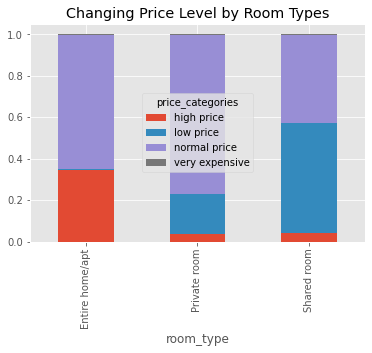

In [ ]:
#Visualizing the room_type according to price_categories

x_label = "room_type"
y_label = "price_categories"
cross_graph = (df.groupby(x_label)[y_label].value_counts(normalize=True).sort_index().unstack())

graph = cross_graph.plot.bar(stacked=True, title = "Changing Price Level by Room Types")

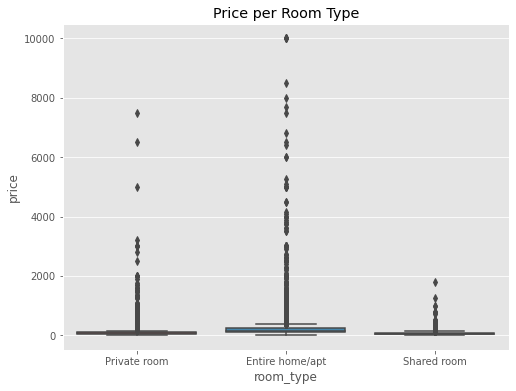

In [ ]:
#Visualizing the room_type according to price levels

x= 'room_type'
y= 'price'
title = 'Price per Room Type'

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=df)
plt.title(title)
plt.ioff()

Text(0.5, 1.0, 'Density and distribution of prices for each room type')

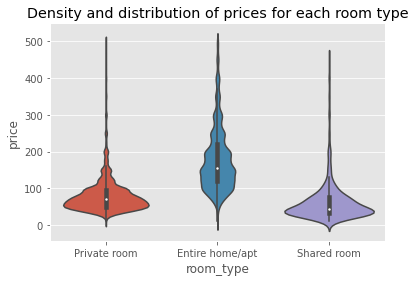

In [ ]:
#Visualizing the room type according to price levels

import seaborn as sns
sub_price = df[df.price < 500]

vis_room = sns.violinplot(data = sub_price, x='room_type', y='price')
vis_room.set_title('Density and distribution of prices for each room type')

As we can see from the above; most of the shared rooms are in the low price category; most private rooms are in the normal price category and most of the apartments are in the high price category.

As a result, room type can effect the price. Hosts who wants a private or a bigger place have to pay more money then shared rooms.

### 2) Neighborhood vs Price

In this part, we are looking for the effects of the location to the Airbnb price levels.

In [ ]:
#Creating a contingency table

neigh_df = pd.crosstab(df["neighbourhood_group"],df["price_categories"])
neigh_df

price_categories,high price,low price,normal price,very expensive
neighbourhood_group,,,,
Bronx,53,311,712,1
Brooklyn,2472,2707,14697,28
Manhattan,6588,706,13981,88
Queens,404,1143,4073,3
Staten Island,30,84,256,1


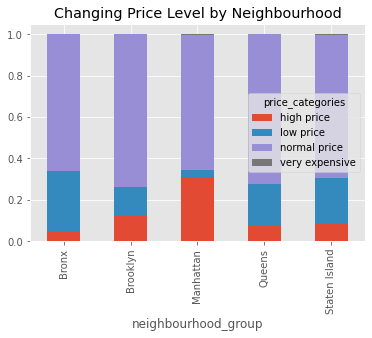

In [ ]:
#Visualizing the neighbourhood_group according to price_categories

x_label = "neighbourhood_group"
y_label = "price_categories"
cross_graph = (df.groupby(x_label)[y_label].value_counts(normalize=True).sort_index().unstack())

graph = cross_graph.plot.bar(stacked=True, title = "Changing Price Level by Neighbourhood")

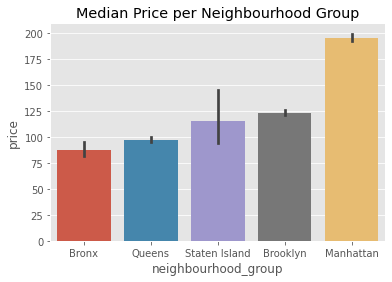

In [ ]:
#Visualizing the neighbourhood_group according to median of prices

title = 'Median Price per Neighbourhood Group'
result = df.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=df, order=result['neighbourhood_group'])
plt.title(title)
plt.ioff()

As we can see from the above, most of the high-priced airbnb's are in Manhattan and Bronx includes most of the low-prices places. We can say that neighbourhood effects the price-level but not for the normal. We see that all neighbourhoods includes nearly same number of normal-prices airbnb's, the effect of neighbourhood factor is important for low and high priced places.

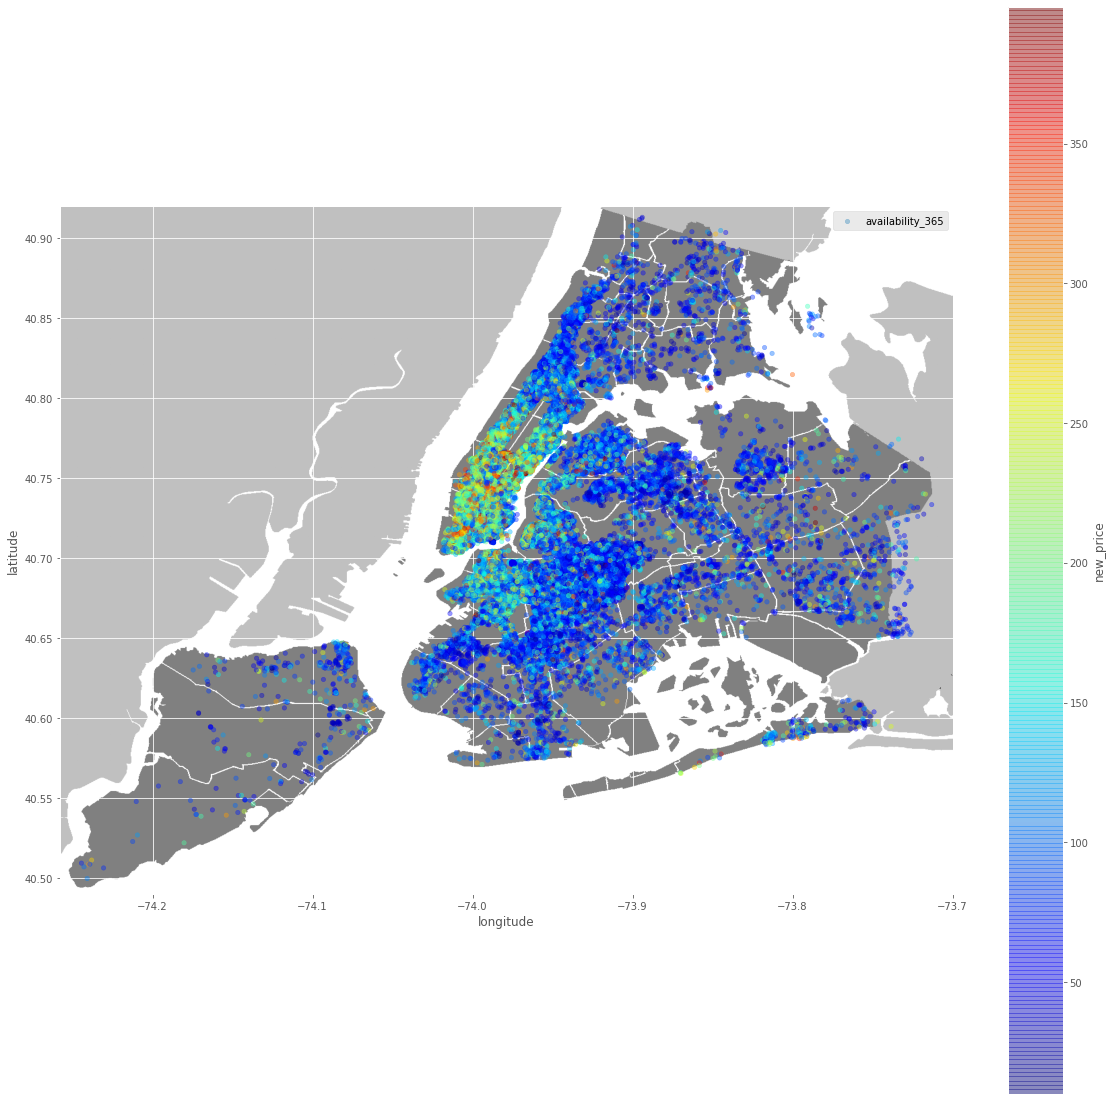

In [ ]:
#Visualizing with a cmap

import urllib
plt.figure(figsize=(20,20))
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
def new_price(pr):
  if 0 < pr < 400:
    return pr
df["new_price"] = df[ "price"].apply(new_price)
df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='new_price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

The cmap above visualizes the geographical distribution of listings along with the relative pricing (increasing with brightening color).

 - Manhattan receives the highest location scores for the downtown region starting with neighbourhoods around Central Park. 
 
 - In Staten Island, the areas close to the State Park have the highest location scores. 
 
 - Brooklyn neighbourhoods close to Manhattan tend to have higher location ratings. Looking at the NY subway system in Brooklyn, it is interesting to observe that the highly rated areas correspond with subway line presence. The same is true for Bronx where subway lines do not go.

In [ ]:
#Removes the outliers that above 3rd quartile and below 1st quartile
def remove(df,room_t, nhood, distance):

    new_piece = df[(df["room_type"]==room_t)&(df["neighbourhood_group"]==nhood)]["new_price"]
    
    #defining quartiles and interquartile range
    q1 = new_piece.quantile(0.25)
    q3 = new_piece.quantile(0.75)
    q_dist = q3-q1

    removal_piece = df[(df.room_type==room_t)&(df["neighbourhood_group"]==nhood) &(df.new_price>(q1-distance*q_dist))&(df.new_price<(q3+distance*q_dist))]
    return removal_piece

#apply the function

towns = df.neighbourhood_group.unique().tolist()

private = pd.DataFrame()
for neighborhood in towns:
    rooms = remove(df, "Private room",neighborhood,3)
    private = private.append(rooms)

shared = pd.DataFrame()
for neighborhood in towns:
    rooms = remove(df, "Shared room",neighborhood,3)
    shared = shared.append(rooms)
    
apt = pd.DataFrame()
for neighborhood in towns:
    rooms = remove(df, "Entire home/apt",neighborhood,3)
    apt = apt.append(rooms)
    
# Create new dataframe for new data    
df_old=df.copy()    
df = pd.DataFrame()
df = df.append([private,shared,apt])

df.shape

(45835, 18)

### 3) The Number of Listings vs Price

In this part; we are searching what is the effect of the number of listings on price level in NYC.

In [ ]:
#Creating a new column "listing_categories"

def listings_categories(x):
  if 0 <= x < 50:
    x = "Low"
  elif 50 <= x < 150:
    x = "Normal"
  elif  150<= x <= 327:
    x = "High"
  return x

df["listings_categories"] = df["calculated_host_listings_count"].apply(listings_categories)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_categories,new_price,listings_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,normal price,149.0,Low
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,normal price,89.0,Low
21,8024,CBG CtyBGd HelpsHaiti rm#1:1-4,22486,Lisel,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130,2,130,2019-07-01,1.09,6,347,normal price,130.0,Low
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364,normal price,80.0,Low
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,2019-07-02,0.61,6,304,normal price,110.0,Low


In [ ]:
#Creating a contingency table

listing_df = pd.crosstab(df["listings_categories"],df["price_categories"])
listing_df

price_categories,high price,low price,normal price
listings_categories,,,
High,392,0,103
Low,6630,4876,33046
Normal,283,75,430


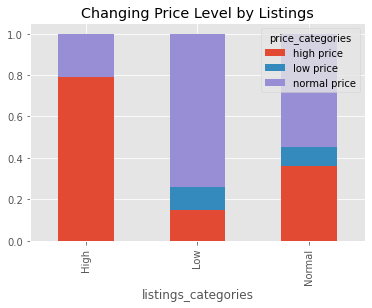

In [ ]:
#Visualizing the listing_categories according to the price_categories

x_label = "listings_categories"
y_label = "price_categories"
cross_graph = (df.groupby(x_label)[y_label].value_counts(normalize=True).sort_index().unstack())

graph = cross_graph.plot.bar(stacked=True, title = "Changing Price Level by Listings")

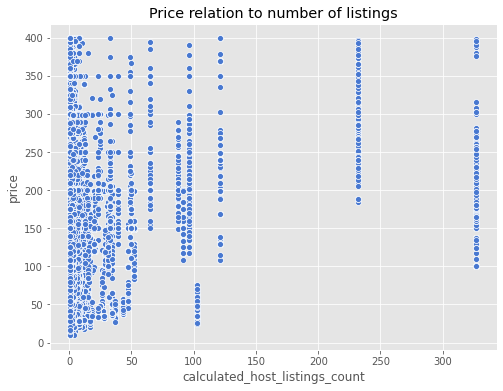

In [ ]:
!pip install dmslogo
from dmslogo.colorschemes import CBPALETTE

sns.set_palette("muted")
x = "calculated_host_listings_count"
y = 'price'

title = 'Price relation to number of listings'

f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=df)
plt.title(title)
plt.ioff()

sns.set_palette(CBPALETTE)

plt.title(title)
plt.ioff()

As a result, we can see that the number of listing effects the price level. If the number of listings are high, so as the price level; but in the low number of listings, we still obsverve the normal price level instead of low price level.

###4)Reviews vs Price

In the fourth part, we want to look how the last reviews, reviews per month and the number of reviews effect the price level of Airbnbs in NYC.

In [ ]:
import datetime as dt

#convert object to datetime:
df["last_review"] = pd.to_datetime(df["last_review"])

df["last_review"]=df["last_review"].apply(lambda x: dt.datetime(2019,7,8)-x)
df["last_review"]=df["last_review"].dt.days.astype("int").replace(18085, 1900)



In [ ]:

#Visualizing the last reviews
def date_replacement(date):
    if date <=3:
        return "3 days ago"
    elif date <= 7:
        return "1 week ago"
    elif date <= 30:
        return "1 month ago"
    elif date <= 183:
        return "6 months ago"
    elif date <= 365:
        return "1 year ago"
    elif date <= 1825:
        return "5 years ago"
    else:
        return "Never reviewed" 
df["last_review_categories"] = df["last_review"].apply(date_replacement)



In [ ]:
#Visualizing the number of reviews
def review_categories(x):
  if 0 <= x < 50:
    return "Low"
  elif 50 <= x < 150:
    return "Normal"
  elif  150 <= x <= 600:
    return "High"
  
df["number_of_reviews_categories"] = df["number_of_reviews"].apply(review_categories)


In [ ]:

#Visualizing the reviews per month
def review_categories(x):
  if 0 <= x < 1.5:
    return "Low"
  elif 1.5 <= x < 3:
    return "Normal"
  elif  3 <= x <= 5:
    return "High"
    
df["per_month_reviews_categories"] = df["reviews_per_month"].apply(review_categories)

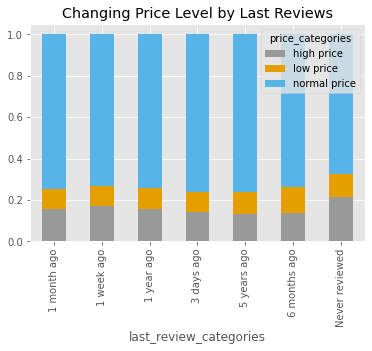

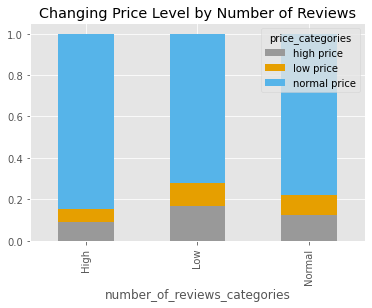

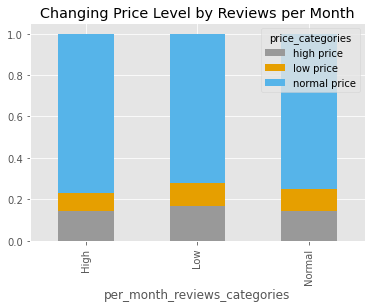

In [ ]:

x_label = "last_review_categories"
y_label = "price_categories"
cross_graph = (df.groupby(x_label)[y_label].value_counts(normalize=True).sort_index().unstack())

graph = cross_graph.plot.bar(stacked=True, title = "Changing Price Level by Last Reviews")


x_label = "number_of_reviews_categories"
y_label = "price_categories"
cross_graph = (df.groupby(x_label)[y_label].value_counts(normalize=True).sort_index().unstack())

graph = cross_graph.plot.bar(stacked=True, title = "Changing Price Level by Number of Reviews")

x_label = "per_month_reviews_categories"
y_label = "price_categories"
cross_graph = (df.groupby(x_label)[y_label].value_counts(normalize=True).sort_index().unstack())

graph = cross_graph.plot.bar(stacked=True, title = "Changing Price Level by Reviews per Month")




As seen from the graph above, there is no readily apparent trend of recency of reviews with respect to room price visible. Further analysis may reveal more insight.

###5)Availability vs Price

In the final part; we are looking whether the availability have an effect on price level or not.

In [ ]:
#separate out numerical variables
a=pd.DataFrame(df.dtypes.copy())
b= a[a[0] != 'object'].reset_index()

#drop id and host id:
numeric_vars=b["index"].tolist()[2:]
numeric_vars

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'new_price']

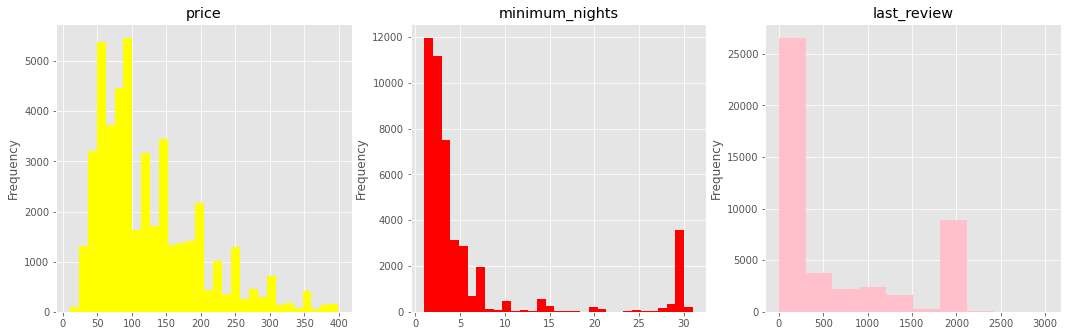

In [ ]:
#Visualize the price, minimum_nights and availability

fig = plt.figure(figsize=(18,18))

ax1 = fig.add_subplot(3,3,2)
ax2 = fig.add_subplot(3,3,3)
ax3 = fig.add_subplot(3,3,1)

ax1.hist(df[numeric_vars[3]], bins=31, color = "red")
ax1.set_ylabel("Frequency")
ax1.set_title(numeric_vars[3])


ax2.hist(df[numeric_vars[5]], color="pink")
ax2.set_ylabel("Frequency")
ax2.set_title(numeric_vars[5])



ax3.hist((df[numeric_vars[2]]), bins=30, color = "yellow")
ax3.set_ylabel("Frequency")
ax3.set_title('price')

plt.show()


Above graphs shows us the minimum nights and availability's importance to the guests. Price is also positively correlated with: increasing availability, the fact that the property is rented by a host who lists other properties, and increasing number of minimum nights

# Machine Learning Models

<font color="blue">
</font>

We use 4 machine learning models:

- Decision Tree Regression
- Neural Network
- Random Forest Regression
- Linear Regression

In [ ]:
from sklearn.tree            import DecisionTreeRegressor
from sklearn.neural_network  import MLPRegressor
from sklearn.ensemble        import RandomForestRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error
from sklearn.metrics         import r2_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb






In [ ]:
target = df['new_price'].copy()
#drop unnecessary columns
df = df.drop(['last_review_categories'], axis=1).copy()
df = df.drop(['number_of_reviews_categories'], axis=1).copy()
df = df.drop(['per_month_reviews_categories'], axis=1).copy()
df = df.drop(['new_price'], axis=1).copy()
df = df.drop(['id'], axis=1).copy()
df = df.drop(['name'], axis=1).copy()
df = df.drop(['host_id'], axis=1).copy()
df = df.drop(['host_name'], axis=1).copy()
df = df.drop(['neighbourhood_group'], axis=1).copy()
df = df.drop(['neighbourhood'], axis=1).copy()
df = df.drop(['room_type'], axis=1).copy()
df = df.drop(['price'], axis=1).copy()
df = df.drop(['price_categories'], axis=1).copy()
df = df.drop(['listings_categories'], axis=1).copy()

#strip the target column from input columns and put it in front
df = pd.concat([target, df], axis=1).copy()
#select input variable columns
nums = df.iloc[:,1:]
df.head()

,new_price,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,149.0,40.64749,-73.97237,1,9,262,0.21,6,365
12,89.0,40.66829,-73.98779,4,167,14,1.34,3,314
21,130.0,40.68069,-73.97706,2,130,7,1.09,6,347
22,80.0,40.67989,-73.97798,1,39,188,0.37,6,364
23,110.0,40.68001,-73.97865,2,71,6,0.61,6,304


Above dataframe is the statistical summary of the columns.

In [ ]:
#Apply logarithmic data transformation for to smooth out the distributions 
for num in numeric_vars[3:8]:
    df["log_("+num+" +1)"] = np.log(df[num]+1)

df["log_price"] = np.log(df.new_price)
target = df['log_price'].copy()

#Drop the unnecessary columns

df = df.drop(['log_price'], axis=1).copy()
df = df.drop(['new_price'], axis=1).copy()
df = df.drop(['minimum_nights'], axis=1).copy()
df = df.drop(['number_of_reviews'], axis=1).copy()
df = df.drop(['reviews_per_month'], axis=1).copy()
df = df.drop(['calculated_host_listings_count'], axis=1).copy()
df = df.drop(['availability_365'], axis=1).copy()


#strip the target column from input columns and put it in front
df = pd.concat([target, df], axis=1).copy()
nums = df.iloc[:,1:]
df.head()

,log_price,latitude,longitude,last_review,log_(minimum_nights +1),log_(number_of_reviews +1),log_(last_review +1),log_(reviews_per_month +1),log_(calculated_host_listings_count +1)
0,5.003946,40.64749,-73.97237,262,0.693147,2.302585,5.572154,0.190620,1.945910
12,4.488636,40.66829,-73.98779,14,1.609438,5.123964,2.708050,0.850151,1.386294
21,4.867534,40.68069,-73.97706,7,1.098612,4.875197,2.079442,0.737164,1.945910
22,4.382027,40.67989,-73.97798,188,0.693147,3.688879,5.241747,0.314811,1.945910
23,4.700480,40.68001,-73.97865,6,1.098612,4.276666,1.945910,0.476234,1.945910


In [ ]:
df = df.drop(['last_review'], axis=1).copy()
df.head()

,log_price,latitude,longitude,log_(minimum_nights +1),log_(number_of_reviews +1),log_(last_review +1),log_(reviews_per_month +1),log_(calculated_host_listings_count +1)
0,5.003946,40.64749,-73.97237,0.693147,2.302585,5.572154,0.190620,1.945910
12,4.488636,40.66829,-73.98779,1.609438,5.123964,2.708050,0.850151,1.386294
21,4.867534,40.68069,-73.97706,1.098612,4.875197,2.079442,0.737164,1.945910
22,4.382027,40.67989,-73.97798,0.693147,3.688879,5.241747,0.314811,1.945910
23,4.700480,40.68001,-73.97865,1.098612,4.276666,1.945910,0.476234,1.945910


Above dataframe is the one that we will using for the analysis.





In [ ]:
#Drop the infinite and the null values
df.replace('', 0, inplace=True)
df.replace(np.inf, 0, inplace=True)

df[df==np.inf] = np.nan
df.fillna(df.mean(), inplace=True)

df.dropna(inplace=True)

In [ ]:
#Fill the null values with 0
df[["log_(reviews_per_month +1)"]] = df[["log_(reviews_per_month +1)"]].fillna(0)


#Drop rows were price of the listing is 0.
free = len(df[df.log_price == 0])
df = df[df.log_price != 0].copy()

In [ ]:
#Checking the null values

df.isnull().sum()

log_price                                  0
latitude                                   0
longitude                                  0
log_(minimum_nights +1)                    0
log_(number_of_reviews +1)                 0
log_(last_review +1)                       0
log_(reviews_per_month +1)                 0
log_(calculated_host_listings_count +1)    0
dtype: int64

In [ ]:
#Checking the types

df.dtypes

log_price                                  float64
latitude                                   float64
longitude                                  float64
log_(minimum_nights +1)                    float64
log_(number_of_reviews +1)                 float64
log_(last_review +1)                       float64
log_(reviews_per_month +1)                 float64
log_(calculated_host_listings_count +1)    float64
dtype: object

In [ ]:
print(df.shape)

(45835, 8)


#Implementation

First of all; we try to find a machine learning tool that yields the best performance to compare their RMSE's. The Root Mean Square error means a measure of how spread out the regression line data points are. In other words, it tells you how concentrated the data is around the line of best fit. Lower values of RMSE indicate better fit.

In [ ]:
#Split the data

data = nums
labels = target
x_train, x_test, y_train, y_test = train_test_split(data,labels, test_size=0.20, random_state=1)

###a) Decision Tree Regression with kFold

In [ ]:
rmse_dt=[]

decision_tree = DecisionTreeRegressor()
k_fold = KFold(5, shuffle = True, random_state=1)

ms_error = cross_val_score(decision_tree,data,labels,scoring = "neg_mean_squared_error", cv=k_fold) 

#Root of the mean squared error
root_mse = np.sqrt(np.absolute(ms_error))
#Find the average
avg_rmse = np.sum(root_mse)/len(root_mse)

rmse_dt.append(avg_rmse)




###b)Neural Network with kFold

In [ ]:
rmse_nndf=[]

multilayer_prceptron = MLPRegressor(activation='relu', max_iter=1000)
k_fold = KFold(5, shuffle = True, random_state=1)

ms_error = cross_val_score(multilayer_prceptron,data,labels,scoring = "neg_mean_squared_error", cv=k_fold) 

#Root of the mean squared error
root_mse = np.sqrt(np.absolute(ms_error))
#Find the average
avg_rmse = np.sum(root_mse)/len(root_mse)

rmse_nndf.append(avg_rmse)


###b)Random Forest Regression

In [ ]:
rmse_rf=[]

random_forest = RandomForestRegressor(n_estimators = 100, random_state=1, min_samples_leaf=2)
k_fold = KFold(5, shuffle = True, random_state=1)

ms_error = cross_val_score(random_forest,data,labels,scoring = "neg_mean_squared_error", cv=k_fold) 

#Root of the mean squared error
root_mse = np.sqrt(np.absolute(ms_error))
#Find the average
avg_rmse = np.sum(root_mse)/len(root_mse)

rmse_rf.append(avg_rmse)


In [ ]:
print("Root mean square error: " +str(round(rmse_dt[0],2))) 
print("Root mean square error: " +str(round(rmse_nndf[0],2)))
print("Root mean square error: " +str(round(rmse_rf[0],2)))

Root mean square error: 0.65
Root mean square error: 0.61
Root mean square error: 0.47


From the above, when we compared the results; Random Forest Model yields the lowest RMSE, followed by Neural Netork and Decision Tree and we say that the lower values of RMSE indicate better fit.

As a result Random Forest yielded the best performance and we continue with optimizing the hyperparameter conditions:

- n_estimator

- max_features

- min_samples_leaf

 with using Random Forest Model and then apply these parameters to see how the overall model performs.

In [ ]:
#optimizing the number of trees to be used in the forest. (n_estimators)

train_results = []
test_results = []
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

for estimator in n_estimators:
    random_forest = RandomForestRegressor(n_estimators=estimator, n_jobs=-1, random_state=1)
    random_forest.fit(x_train, y_train)

    #For the train
    train_prediction = random_forest.predict(x_train)
    root_mse = round(np.sqrt(mean_squared_error(y_train, train_prediction)),2)
    train_results.append(root_mse)

    #For the test
    y_prediction = random_forest.predict(x_test)
    root_mse = round(np.sqrt(mean_squared_error(y_test, y_prediction)),2)
    test_results.append(root_mse)
    

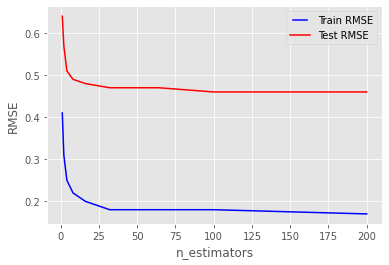

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
#Visualising the results

line1, = plt.plot(n_estimators, train_results, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test RMSE')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('RMSE')

plt.xlabel('n_estimators')

plt.show()

In [ ]:
#Optimizing the maximum number of features considered for splitting a node. (max_features)

train_results = []
test_results = []
max_features = ['auto','sqrt','log2']

for feature in max_features:
    random_forest = RandomForestRegressor(max_features=feature, n_estimators=100, n_jobs=-1, random_state=1)
    random_forest.fit(x_train, y_train)
    
    #For the train
    train_prediction = random_forest.predict(x_train)
    root_mse = round(np.sqrt(mean_squared_error(y_train, train_prediction)),2)
    train_results.append(root_mse)

    #For the test
    y_prediction = random_forest.predict(x_test)
    root_mse = round(np.sqrt(mean_squared_error(y_test, y_prediction)),2)
    test_results.append(root_mse)
    

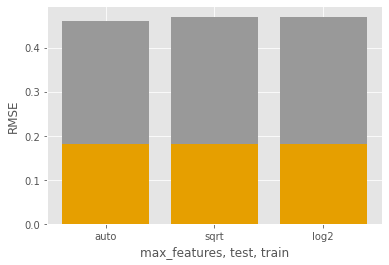

In [ ]:
#Visualizing the results

plt.bar(max_features,test_results)
plt.bar(max_features,train_results)

plt.ylabel('RMSE')

plt.xlabel('max_features, test, train')

plt.show()

In [ ]:
#Optimizing the minimum number of samples. (min_sample_leaf)

train_results = []
test_results = []
min_samples_leaf = [1,2,10,50,70,100]

for leaf in min_samples_leaf:
    random_forest = RandomForestRegressor(min_samples_leaf = leaf, max_features='auto', n_estimators=100, n_jobs=-1, random_state=1)
    random_forest.fit(x_train, y_train)

    #For the train
    train_prediction = random_forest.predict(x_train)
    root_mse = round(np.sqrt(mean_squared_error(y_train, train_prediction)),3)
    train_results.append(root_mse)

    #For the test
    y_prediction = random_forest.predict(x_test)
    root_mse = round(np.sqrt(mean_squared_error(y_test, y_prediction)),3)
    test_results.append(root_mse)
    


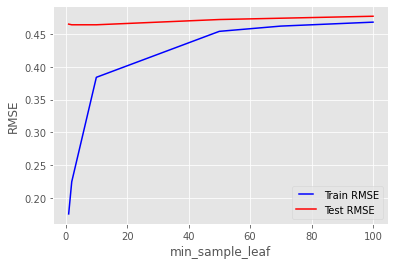

In [ ]:
from matplotlib.legend_handler import HandlerLine2D

#Visualizing the results
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test RMSE')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('RMSE')

plt.xlabel('min_sample_leaf')

plt.show()

In [ ]:
print("Test results are: ")
test_results

Test results are: 


[0.465, 0.464, 0.464, 0.472, 0.474, 0.477]

Based on the hyperparameter optimization the best hyperparameter conditions are:

- n_estimator = minimum 100

- max_features = 'auto'

- min_samples_leaf = at least 1

Now we apply these parameters to see how the overall model performs:

In [ ]:
#Apply the hyperparameter optmized model:
from sklearn.metrics import accuracy_score

random_forest = RandomForestRegressor(n_estimators = 300, max_features = 'auto', min_samples_leaf=2, random_state=1)
random_forest.fit(x_train,y_train)
pred = random_forest.predict(x_test)


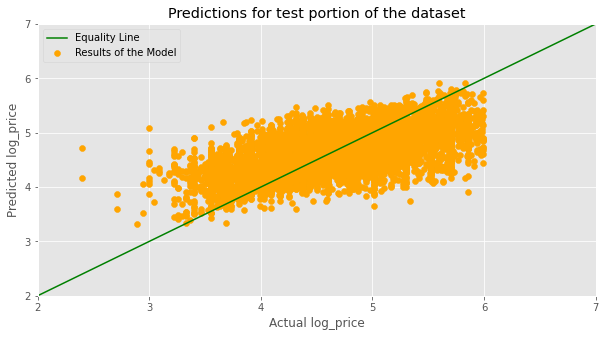

In [ ]:
#Plot the results of the model:

plt.figure(figsize=(10,5))

plt.scatter(y_test,pred,color="orange",label="Results of the Model")

plt.plot([2,7],[2,7], color="green", label = "Equality Line")


plt.title("Predictions for test portion of the dataset")

plt.xlim(2,7)
plt.ylim(2,7)
plt.legend()

plt.ylabel("Predicted log_price")
plt.xlabel("Actual log_price")

plt.show()

In [ ]:
print("R-squared: "+str(round(r2_score(y_test,pred),2)))

print("Root Mean Square Error: "+str(round(np.sqrt(mean_squared_error(y_test,pred)),3)))

R-squared: 0.39
Root Mean Square Error: 0.463


As we see in the graph above, on the low end of the actual log_price the results tend to cluster above the line, while on the high end they tend to cluster below the line.

This has consequences of underpredicting high prices and overpredicting low prices.

##c)Linear Regression

In [ ]:

linear_regression = LinearRegression(n_jobs=-1)
param_grid = dict(fit_intercept=[True,False], normalize=[True,False], copy_X=[True,False])

grid_lr = GridSearchCV(linear_regression, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_lr.fit(x_train,y_train)

#Calculate the best score, parameters and estimator
print("Best Score: {}".format(grid_lr.best_score_))
print("Best Parameters: {}".format(grid_lr.best_params_))
print("Best Estimator: {}".format(grid_lr.best_estimator_))


model_lr = grid_lr.best_estimator_

Best Score: -0.3082146470202668
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best Estimator: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [ ]:
#calculating the R-squared, RMSE and Average Error
def evaluate(model, X, y, title):
    predictions = model.predict(X)
    errors = abs(np.expm1(predictions) - np.expm1(y))
    rsquared = r2_score(y,predictions)
    root_mse = np.sqrt(mean_squared_error(np.expm1(y),np.expm1(predictions)))
    
    print(title)
    print('R^2: {:0.4f}'.format(rsquared))
    print('RMSE: {:0.002f} '.format(root_mse))
    print('Average Error: {:0.4f}'.format(np.mean(errors)))  
    return predictions
     
title0='Linear Regression:'
model = model_lr

title=title0 + ' training set model performance'
prediction_train=evaluate(model, x_train, y_train, title)

print("")

title=title0 + ' test set model performance'
prediction_test=evaluate(model, x_test, y_test, title)


Linear Regression: training set model performance
R^2: 0.1357
RMSE: 72.07 
Average Error: 52.4322

Linear Regression: test set model performance
R^2: 0.1280
RMSE: 72.02 
Average Error: 52.4102


In [ ]:
def scatter_plot(prediction1,y1,prediction2,y2,title):
    
    a=min(min(prediction1),min(y1),min(prediction2),min(y2))-0.2
    b=max(max(prediction1),max(y1),max(prediction2),max(y2))+0.2
    
    plt.rcParams['figure.figsize']=(10,4)
    plt.style.use(style='ggplot')
    
    plt.scatter(x=prediction1, y=y1, color='red',label='Training data',alpha=.75)
    plt.scatter(x=prediction2, y=y2, color='blue', marker='s', label='Test data',alpha=.75)
    
    plt.plot([a, b], [a, b], c = "black")
    
    plt.ylabel('log(input price)',fontsize=16)
    plt.xlabel('log(predicted price)',fontsize=16)
    
    plt.tick_params(labelsize=16)
    
    plt.title(title,fontsize=16)
    
    plt.legend(fontsize=16)
    plt.show()

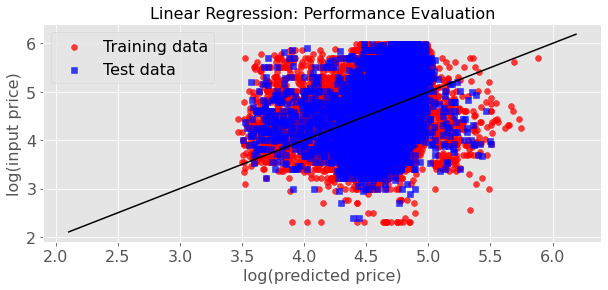

In [ ]:
#Visualizing the performance of the model

title = title0 + ' Performance Evaluation'
scatter_plot(prediction_train,y_train,prediction_test,y_test,title)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(x_test)
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
31744,14941.0,58569.0
40788,80403.0,70691.0
14103,486380.0,67359.0
28022,332247.0,40484.0
34738,27711.0,40914.0
40374,413782.0,73886.0
28251,31609.0,35773.0
47536,247530.0,64735.0
5717,39366.0,64533.0
39220,102479.0,80340.0


## Conclusion

<font color="blue">
</font>


###Evaluating the Project

- In the project, we analyze five factors for seeing how they effect the price level of Airbnbs in NYC. They are:

 - Room Type
 - Neighbourhood
 - Number of Listings
 - Reviews
 - Availability

 As a result, we see that except the reviews, all of the factors have a direct proportion with he price level. 

- **In the data exploration part:**

           We use categorizal methods for comparing variables clearly. We created new columns called:
            -  price_categories
            - listing_categories
            - last_review_categories
            - per_month_review_categories
            - number_of_reviews_categories 
            which are seperated as "high", "medium" and "low" according to their values. 

           We use several visualization methods like correlation, cmap, bar chart, histograms, boxplot, violinplot and scatterplot for showing the results.



**- In the machine learning part:**

      We use four models called:
       - Decision Tree Regression
       - Neural Network 
       - Random Forest Regression
       - Linear Regression


      Firstly, we use feature selection; dropped unnecesary columns and create a new dataframe for the machine learning models.
 
 
      Secondly, we calculated RMSE's with decision tree regression, neural network and random forest regression and get the best result from the random forest regression. So, we continue with that model for optimizing the parameters n_estimators, min_samples_leaf and max_features. After finding the optimal values for the parameters, we apply these parameters to see how the overall model performs.

       -  In addition to these, we also use linear regression model for the performance evaluation.

### Applicability of the Solution

####Improvements

The study may be improved as follows: 
-  Expand or shrink the feature set such that RMSE error will be reduced
- Employ other machine learning models such as k-nearest neighbors and support vector machines.

####Additions

We add some extra parts to the template of the project. 
- Under the "Introduction", we create Utilized Datasets and Table and Content.
- Under the "Data Exploration", we create subtitles for showing our works clearly:
  - Dataset: Uploading the data as dataframe.
  - Exploratory Data Analysis: Includes general anaylsis, summary of the dataframe(types,describe), clearing the null variables and create a new dataframe.
  - Factors: Includes all factors which may have an effect on the price level. In all factors, we use visualization for showing our results.






####Results

- From all of the machine learning models, random forest regression performs the best RMSE.
- For the overall model performance, according to the random forest regression; we saw that on the low end of the actual log_price the results tend to cluster above the line, while on the high end they tend to cluster below the line due to underpredicting high prices and overpredicting low prices.
- In the linear regression model, our r-squared value is too small, far away from 1. It means that is not a better way to perform our data.

##References

1. https://www.kaggle.com/spuchalski/predicting-price-of-airbnb-listings-in-nyc

2. https://www.kaggle.com/wguesdon/nyc-airbnb-eda-visualization-regression#4.-Modeling-first-model

3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

4. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

5. https://d12dkjq56sjcos.cloudfront.net/pub/media/wysiwyg/newyork/01-city-landing/New-York-Skyline-Big-Bus-Tours-Jan-2018.jpg